In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns



In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names


In [3]:
# Create DataFrame for visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


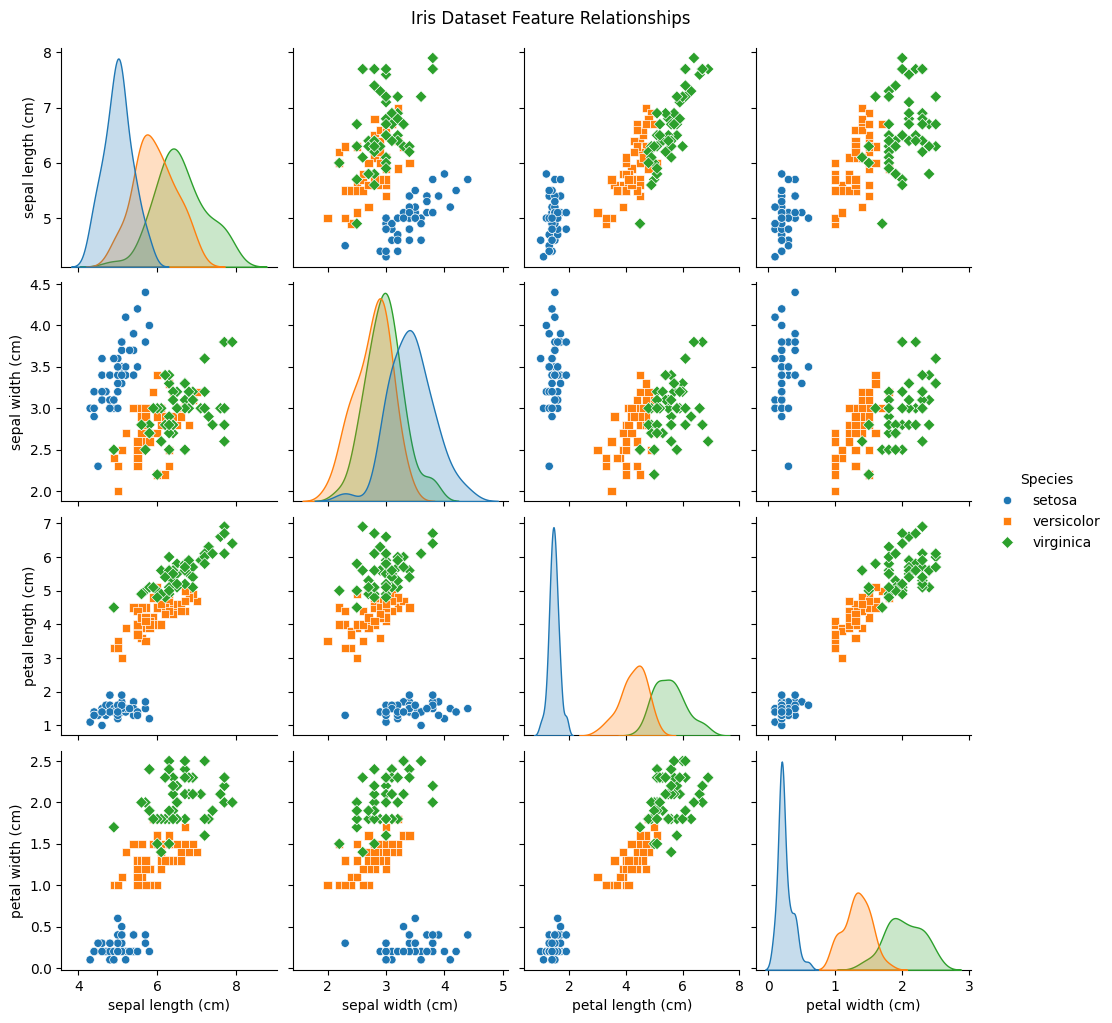

In [4]:
# Data visualization
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'])
plt.suptitle('Iris Dataset Feature Relationships', y=1.02)
plt.show()


In [5]:
# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [7]:
# Find optimal k value
k_values = range(1, 20)
accuracies = []


In [8]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


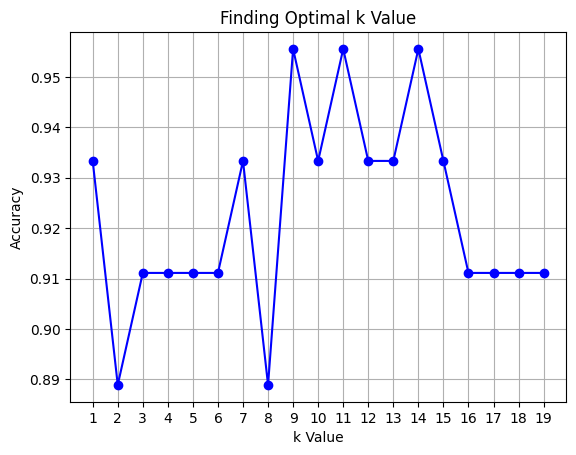

In [9]:
plt.plot(k_values, accuracies, 'bo-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Finding Optimal k Value')
plt.xticks(k_values)
plt.grid()
plt.show()


In [10]:
# Train model with optimal k (k=3 from plot)
optimal_k = 3
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [11]:
# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


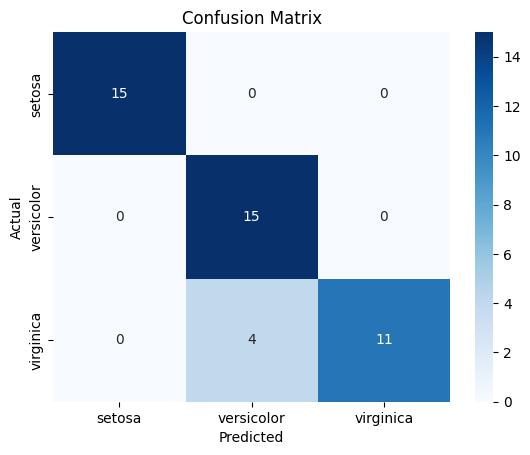

In [12]:
# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [13]:
# Print correct and wrong predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Actual'] = results['Actual'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
results['Predicted'] = results['Predicted'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

correct = results[results['Actual'] == results['Predicted']]
wrong = results[results['Actual'] != results['Predicted']]

print("\nCorrect Predictions:")
print(correct)
print("\nNumber of correct predictions:", len(correct))
print("\nWrong Predictions:")
print(wrong)
print("\nNumber of wrong predictions:",len(wrong))


Correct Predictions:
        Actual   Predicted
0    virginica   virginica
1   versicolor  versicolor
3   versicolor  versicolor
4    virginica   virginica
5    virginica   virginica
6   versicolor  versicolor
7   versicolor  versicolor
8       setosa      setosa
9    virginica   virginica
10      setosa      setosa
11      setosa      setosa
12   virginica   virginica
13   virginica   virginica
14      setosa      setosa
15   virginica   virginica
16  versicolor  versicolor
17      setosa      setosa
18      setosa      setosa
19      setosa      setosa
20  versicolor  versicolor
21      setosa      setosa
22  versicolor  versicolor
23   virginica   virginica
25  versicolor  versicolor
26  versicolor  versicolor
27  versicolor  versicolor
28  versicolor  versicolor
29      setosa      setosa
31   virginica   virginica
32  versicolor  versicolor
33      setosa      setosa
34   virginica   virginica
35      setosa      setosa
36      setosa      setosa
37      setosa      setosa
38    